In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import seaborn as sns
import glob
import folium
#import waffle

In [2]:
mpl.style.use(['seaborn-darkgrid', 'dark_background'])

## Loading the data

In [3]:
uber = pd.read_csv('uber-raw-data-apr14.csv', parse_dates= ['Date/Time'])
uber.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [4]:
#Not much information. But no NaNs, so that is good.
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  564516 non-null  datetime64[ns]
 1   Lat        564516 non-null  float64       
 2   Lon        564516 non-null  float64       
 3   Base       564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.2+ MB


## Getting new columns

In [5]:
uber['day'] = uber['Date/Time'].dt.day_name()

In [6]:
uber['hour'] = uber['Date/Time'].dt.hour 

## Let's Visualize them

In [7]:
a = uber['Base'].value_counts() 
a = a.to_frame().reset_index()

Text(0.5, 0, 'ID')

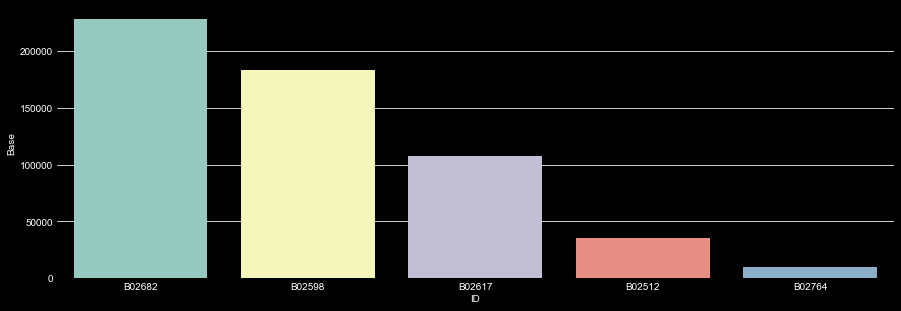

In [8]:
fig, ax = plt.subplots(figsize= (15,5))
sns.barplot(x = a['index'], y = a['Base'])
plt.xlabel('ID')

In [9]:
#More complicated but specific manner
days = uber['day'].value_counts()
days = days.to_frame().reset_index()
days = days.rename(columns = {'index':'Days', 'day':'Count'})

<AxesSubplot:xlabel='Count', ylabel='Days'>

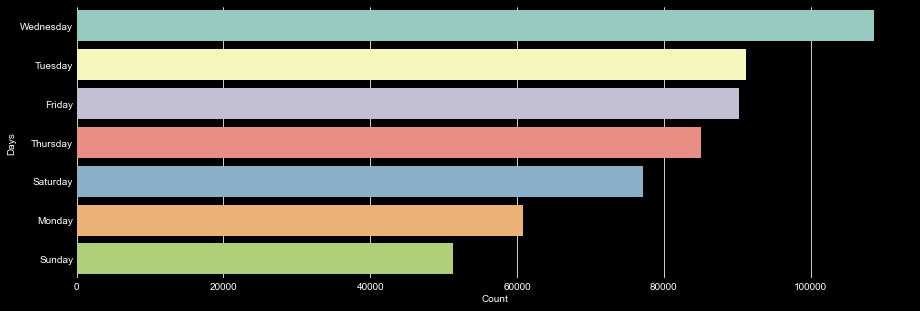

In [10]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.barplot(y = days['Days'], x = days['Count'], orient= 'h' )

<AxesSubplot:xlabel='hour', ylabel='count'>

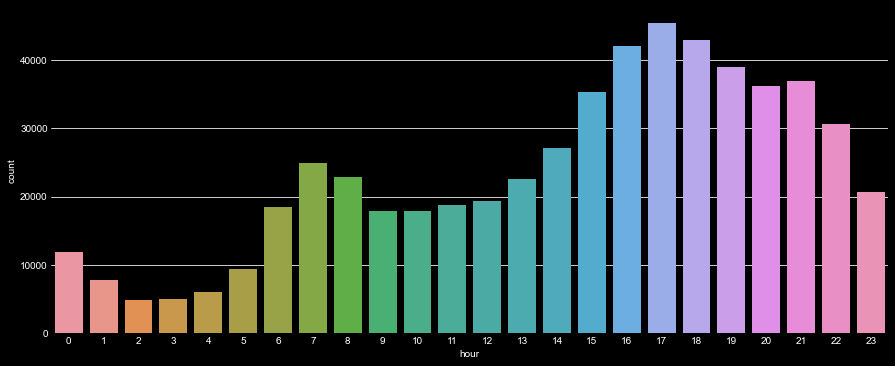

In [11]:
fig, ax = plt.subplots(figsize= (15, 6))
sns.countplot(x = uber['hour'])

## That was too easy, let's see more data

In [12]:
#Load all the csv files 
def load_files(path):
    li = []
    all_files = glob.glob(path + '/uber-raw-data-*.csv')
    
    for file in all_files:
        df = pd.read_csv(file)
        li.append(df)
        
    fname = pd.concat(li, axis=0, ignore_index=True)
    return fname

In [13]:
all_uber = load_files("D:/Data Science projects/python/Projects/uber")

In [14]:
all_uber.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [15]:
all_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [16]:
all_uber['Date/Time'] = pd.to_datetime(all_uber['Date/Time'])

## let's try those graphs again but on all the data

In [17]:
a = all_uber['Base'].value_counts()
a = a.to_frame().reset_index()
a = a.rename(columns= {'index':'Base', 'Base':'Count'})

Text(0, 0.5, 'Count')

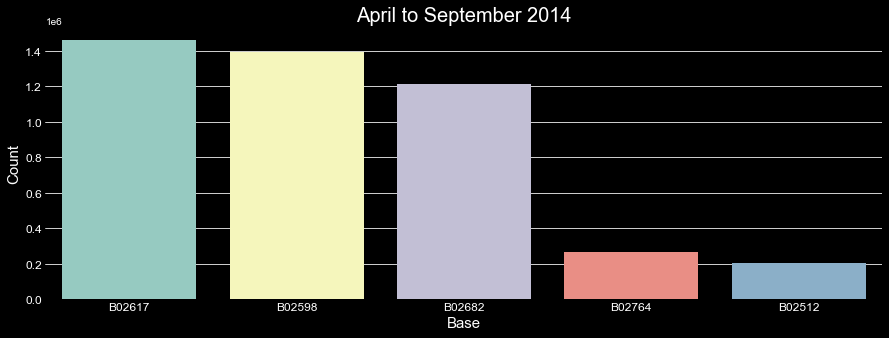

In [18]:
fig, ax = plt.subplots(figsize= (15,5))
sns.barplot(x=a['Base'], y=a['Count'])
plt.title('April to September 2014', size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Base', size = 15)
plt.ylabel('Count', size = 15)

In [19]:
all_uber['Day'] = all_uber['Date/Time'].dt.day_name()

In [20]:
all_uber['hour'] = all_uber['Date/Time'].dt.hour

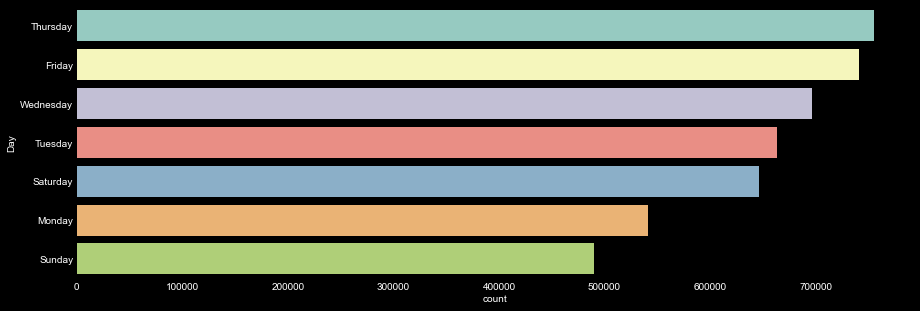

In [175]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(y = all_uber['Day'], order = all_uber['Day'].value_counts().index)
plt.grid(False)

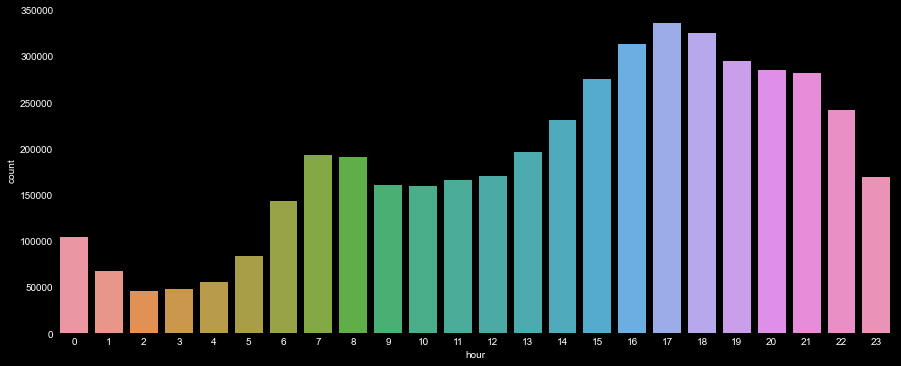

In [176]:
fig, ax = plt.subplots(figsize= (15, 6))
sns.countplot(x = all_uber['hour'])
plt.grid(False)

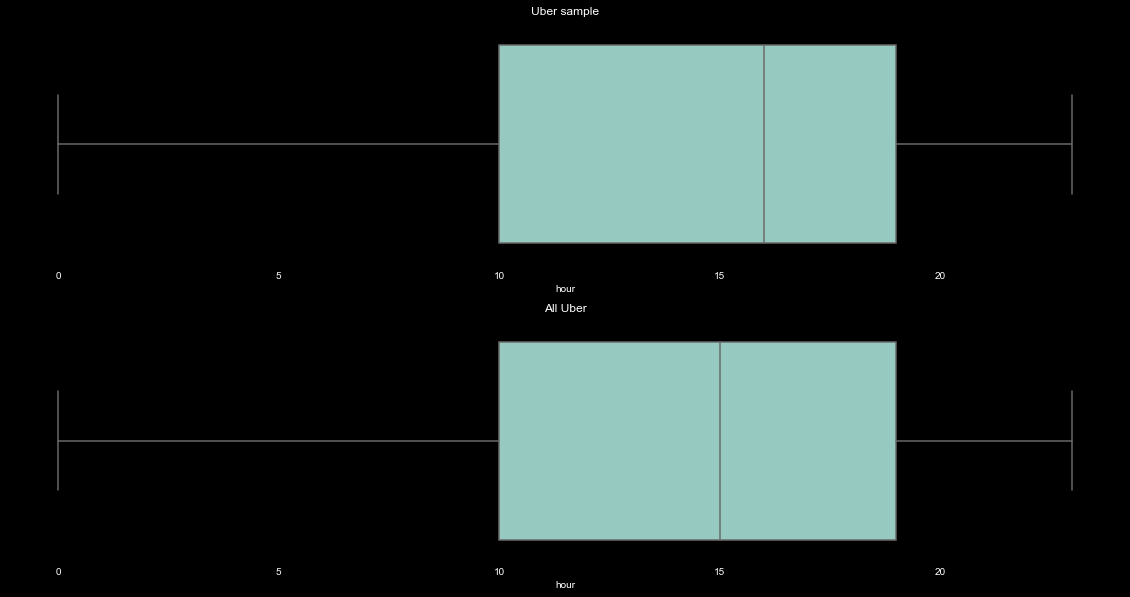

In [206]:
## lets compare this to the last one 

fig, ax = plt.subplots(2, 1, figsize= (20, 10))

ax1 = sns.boxplot(x= uber['hour'], ax= ax[0])
ax1.set_title('Uber sample')
ax1.grid(False)

ax2 = sns.boxplot(x = all_uber['hour'], ax=ax[1])
ax2.set_title('All Uber')
ax2.grid(False)

## Now, let's get some other information

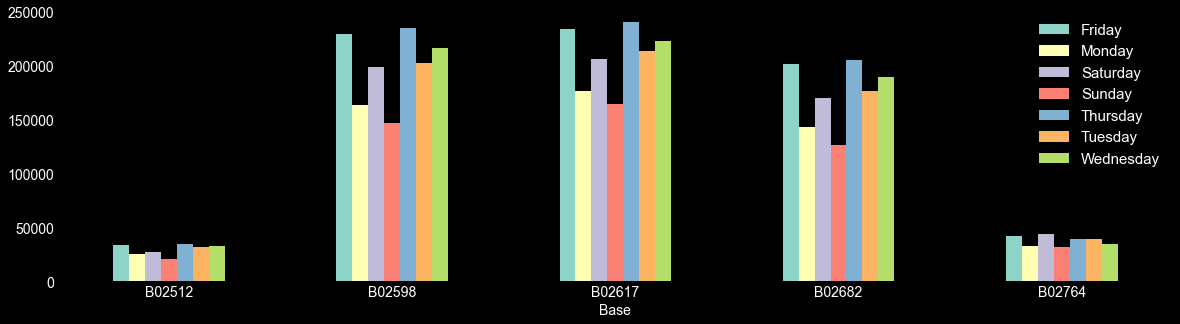

In [190]:
#Each base by day
all_uber.groupby(['Base', 'Day'])['Day'].size().unstack().plot.bar(figsize=(20,5), rot= 0, grid = False)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel('Base', fontsize = 14)
plt.legend(fontsize = 15)

Text(0.5, 0, 'Base')

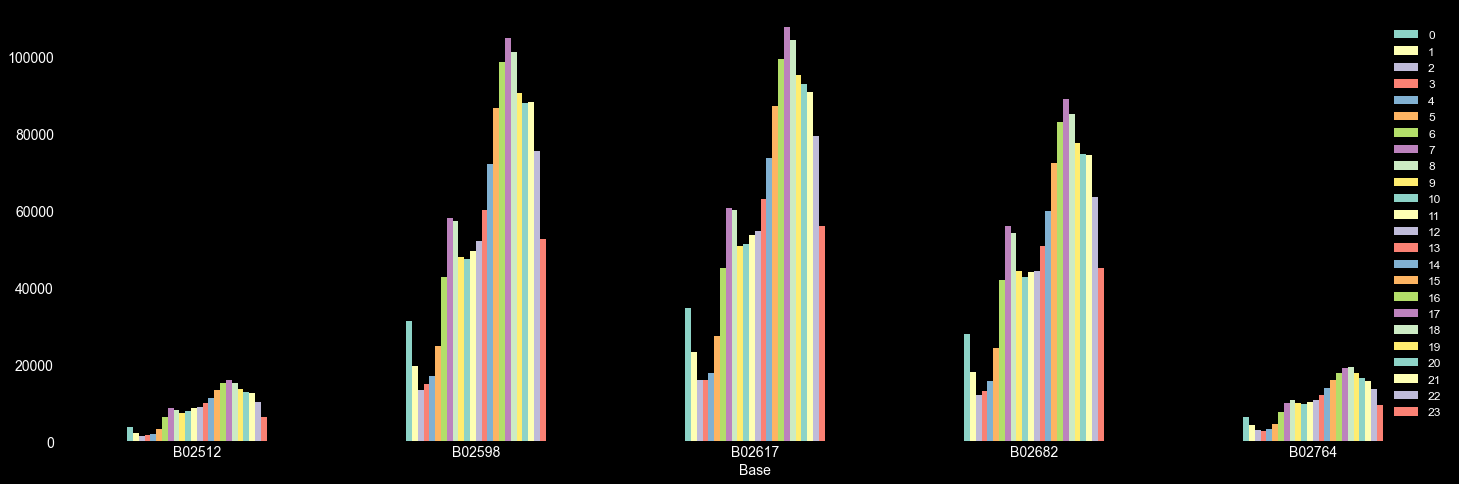

In [196]:
#Each base by hour
all_uber.groupby(['Base', 'hour'])['hour'].size().unstack().plot.bar(figsize=(25,8), rot= 0, grid = False, fontsize = 12)
plt.legend(loc='center right', fontsize = 12)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlabel('Base', fontsize = 14)

## Houston, give me the space look

In [201]:
uber_map = folium.Map(location = [40.712742, -74.013382], zoom_start=11)
uber_map

In [202]:
lat_sample = all_uber.Lat[:750]
lon_sample = all_uber.Lon[:750]

In [203]:
incidents = folium.map.FeatureGroup()

for lat, long in zip(lat_sample, lon_sample):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, long],
            radius = 5,
            color = 'Green',
            fill_color = 'Green',
            fill = True,
            fill_opacity = 0.6)
    )

In [204]:
uber_map.add_child(incidents)